# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Step 1: Reading and Understanding the Data

In [231]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [232]:
# Read the given CSV file, and view some sample records

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let's inspect the various aspects of our dataframe

In [233]:
#Determining the number of rows and columns
bike.shape

(730, 16)

In [234]:
#summary of all the numeric columns in the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [235]:
#Datatypes of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [236]:
#Checking missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values in the dataset

In [237]:
#Mapping variables season, month, weathersit, weekday

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Data Visualisation

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables,  to visualise which variables are most correlated to the target variable 'count'.

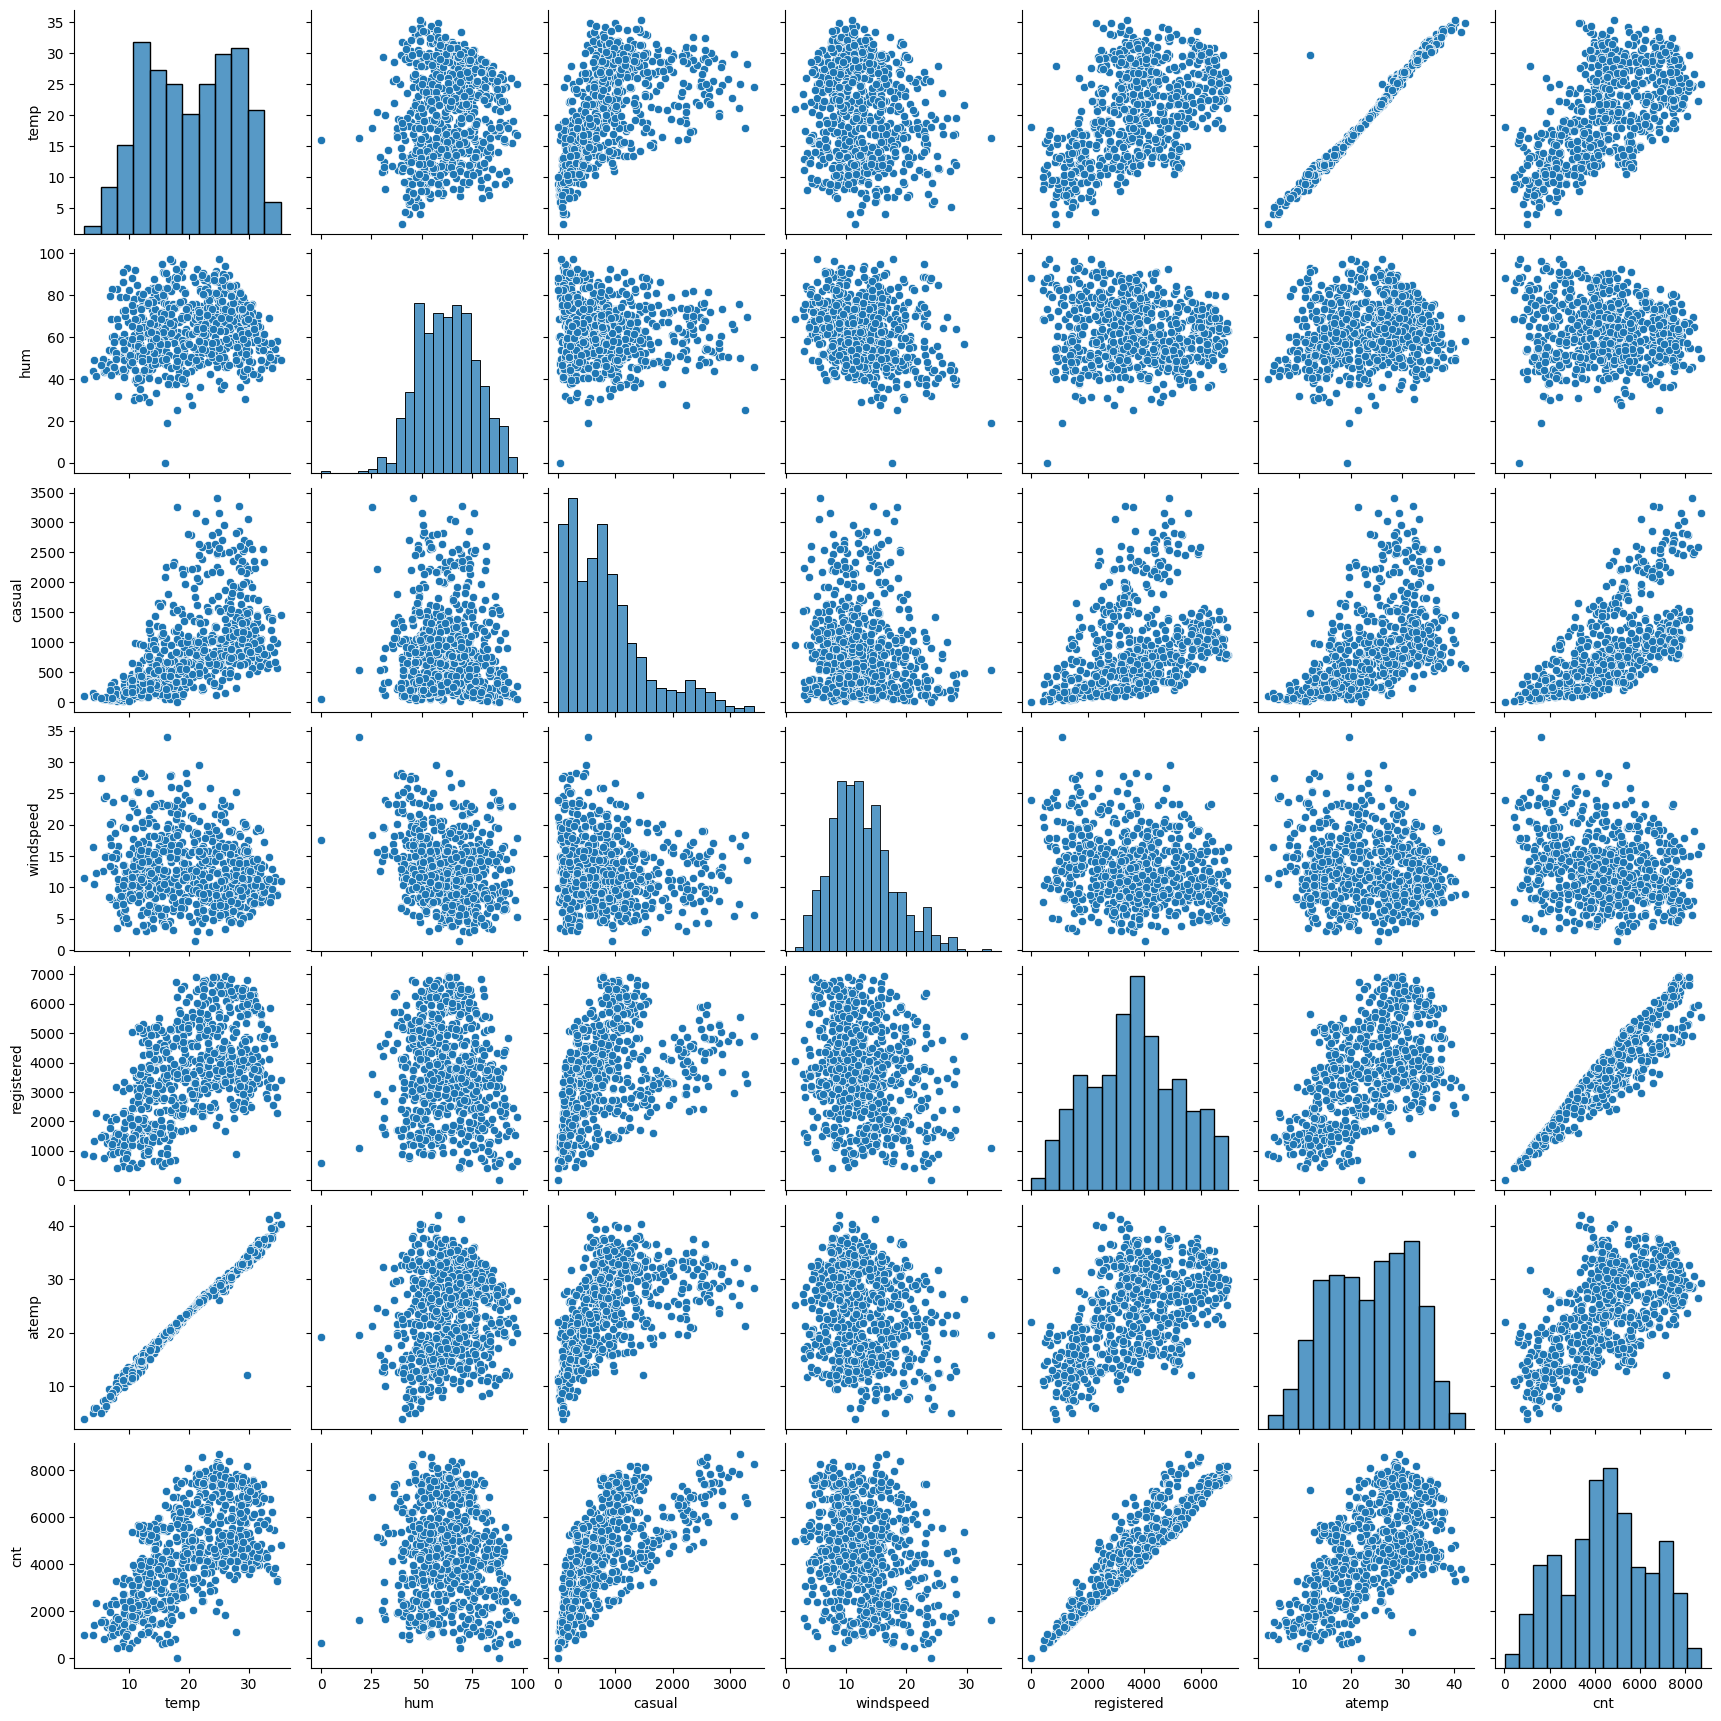

In [238]:
#Pairplot for numeric variables
sns.pairplot(bike, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt'])
plt.show()

By analysing all the plots above, we can see that there are some independent variables look positively correlated to the 'count' variable. 
-  Bike rentals are more correlated to temperature



### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [239]:
##Relationship between categorical and continuous variable
fig = px.box(bike, x="mnth", y="cnt")
fig.show()

In [240]:
fig = px.box(bike, x="season", y="cnt")
fig.show()

In [241]:
fig = px.box(bike, x="weathersit", y="cnt")
fig.show()

In [242]:
fig = px.box(bike, x="weekday", y="cnt")
fig.show()

In [243]:
fig = px.box(bike, x="yr", y="cnt")
fig.show()

The plots above shows the relationship between categorical variables and a Target variable.  
- Bike Rentals are more during the Fall season and then in summer
- Bike Rentals are more in the year 2019 compared to 2018
- Bike Rentals are more in partly cloudy weather
- Bike Rentals are more on Saturday,wednesday and thursday


#### 4: Month

In [244]:
#Relation between month and 
'''plt.figure(figsize=(10,5))
sns.barplot(['mnth','cnt'],hue='Year',data= bike , palette='Paired')
plt.show()'''

"plt.figure(figsize=(10,5))\nsns.barplot(['mnth','cnt'],hue='Year',data= bike , palette='Paired')\nplt.show()"

##### Bike Rentals are more in the year 2019 compared to 2018

#### 5: Temperature

In [245]:
#scatter plot for temperature to count
fig = px.scatter(bike, x="cnt", y="atemp",
                 width=800, height=400)
fig.show()

 Temperature has a linear relationship with count

#### 6: Humidity

In [246]:
fig = px.scatter(bike, x="cnt", y="hum",
                 width=800, height=400)
fig.show()

In [247]:
fig = px.scatter(bike, x="cnt", y="windspeed",
                 width=800, height=400)
fig.show()

### Heatmap 

In [248]:
#Heatmap to see correlation between variables
corr = bike.corr()
corr.style.background_gradient(cmap='coolwarm')

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866026,0.016275,-0.004619,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
yr,0.866026,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.016275,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.004619,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
temp,0.150738,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.250502,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.596911,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411


As is visible from the pairplot and the heatmap, we can see temp, atemp, casual,registered,instant variables are correlated to 'count' variable
- We can also see some other variables are also most correlated.
- **Both the plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model**
- **So yes we can consider a Linear Regression Model.**

### Drop the unnecessary variables from the dataset

We can see the dataset has some variables that are not required. 
**We can drop instant, dteday, casual, registered**

In [249]:
#drop unnecessary columns
bike=bike.drop(['instant','dteday','casual', 'registered','temp'], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


### Check the datatypes

In [250]:
#Checking datatypes of all the columns
bike.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## Step 3: Data Preparation

### Dummy variables

In [251]:
# # Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column from  using 'drop_first = True'pd.get_dummies(bike.season,drop_first=True)
months=pd.get_dummies(bike.mnth,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

#bike=pd.concat([seasons,bike], axis=1)


In [252]:
# Add the results to the original bike dataframe
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


In [253]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,11.46350,43.6957,12.522300,1600


In [254]:
#Number of rows and columns
bike.shape

(730, 29)

In [255]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
corr = bike.corr()
corr.style.background_gradient(cmap='coolwarm')

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
Aug,1.000000,-0.092814,-0.087816,-0.092814,-0.092814,-0.091169,-0.092814,-0.092814,-0.091169,-0.092814,-0.091169,0.001151,-0.012852,-0.012852,0.002349,0.002349,0.017673,-0.052432,-0.019680,-0.174286,-0.176856,-0.173001,0.000000,-0.052432,0.038238,0.330939,0.021580,-0.069125,0.182100
Dec,-0.092814,1.000000,-0.087816,-0.092814,-0.092814,-0.091169,-0.092814,-0.092814,-0.091169,-0.092814,-0.091169,0.001151,0.015153,0.001151,0.002349,-0.011709,-0.010557,0.035760,0.063484,0.076523,-0.176856,0.284740,0.000000,0.006363,-0.014589,-0.277484,0.082200,-0.054616,-0.173878
Feb,-0.087816,-0.087816,1.000000,-0.087816,-0.087816,-0.086259,-0.087816,-0.087816,-0.086259,-0.087816,-0.086259,-0.000804,-0.000804,-0.000804,0.000323,0.000323,0.001458,-0.018814,-0.009487,0.503859,-0.167331,-0.163683,-0.000000,0.011980,-0.003093,-0.310845,-0.130521,0.096093,-0.273848
Jan,-0.092814,-0.092814,-0.087816,1.000000,-0.092814,-0.091169,-0.092814,-0.092814,-0.091169,-0.092814,-0.091169,0.015153,0.001151,0.015153,-0.011709,0.002349,-0.010557,-0.023035,0.032297,0.532541,-0.176856,-0.173001,0.000000,0.035760,-0.025154,-0.439006,-0.089555,0.062117,-0.367167
July,-0.092814,-0.092814,-0.087816,-0.092814,1.000000,-0.091169,-0.092814,-0.092814,-0.091169,-0.092814,-0.091169,0.001151,0.001151,0.015153,-0.011709,0.002349,-0.010557,-0.023035,-0.113241,-0.174286,-0.176856,-0.173001,0.000000,0.006363,-0.014589,0.429350,-0.063757,-0.096090,0.166236
June,-0.091169,-0.091169,-0.086259,-0.091169,-0.091169,1.000000,-0.091169,-0.091169,-0.089552,-0.091169,-0.089552,-0.008956,0.005257,-0.008956,0.006451,-0.007819,0.007654,-0.051502,-0.065622,-0.171196,0.285757,-0.169933,-0.000000,-0.051502,0.021301,0.300768,-0.109048,-0.019624,0.195568
Mar,-0.092814,-0.092814,-0.087816,-0.092814,-0.092814,-0.091169,1.000000,-0.092814,-0.091169,-0.092814,-0.091169,-0.012852,0.001151,-0.012852,0.016408,0.002349,0.003558,0.006363,0.032297,0.281731,0.072119,-0.173001,0.000000,-0.052432,0.027672,-0.173135,-0.083887,0.126575,-0.128456
May,-0.092814,-0.092814,-0.087816,-0.092814,-0.092814,-0.091169,-0.092814,1.000000,-0.091169,-0.092814,-0.091169,0.001151,-0.012852,0.001151,0.002349,0.016408,0.003558,-0.052432,0.042693,-0.174286,0.524801,-0.173001,0.000000,0.006363,0.006542,0.170447,0.131273,-0.029534,0.132553
Nov,-0.091169,-0.091169,-0.086259,-0.091169,-0.091169,-0.089552,-0.091169,-0.091169,1.000000,-0.091169,-0.089552,-0.008956,-0.008956,-0.008956,0.006451,0.006451,0.007654,0.038013,-0.055071,-0.171196,-0.173720,0.526984,-0.000000,0.067852,-0.010871,-0.196877,-0.005837,-0.025873,-0.040344
Oct,-0.092814,-0.092814,-0.087816,-0.092814,-0.092814,-0.091169,-0.092814,-0.092814,-0.091169,1.000000,-0.091169,0.015153,0.001151,0.001151,-0.011709,0.002349,0.003558,0.094554,0.042693,-0.174286,-0.176856,0.536497,0.000000,0.006363,-0.004024,-0.004775,0.141557,-0.060133,0.108846


We can see that temperature,Summer season,June to october months are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals.

## Step 4: Splitting the Data into Training and Testing Sets

Before model building, you first need to perform the test-train split and scale the features.

In [256]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [257]:
#Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features

It is important to have all the variables on the same scale for the model to be easily interpretable. 
We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 
- **There are two common ways of rescaling:**

- Min-Max scaling (Normalisation):Between 0 and 1
- Standardisation :mean-0, sigma-1


##### Min-Max scaling

In [258]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['atemp','hum','windspeed','cnt']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.391735,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.318819,0.751824,0.380981,0.191095


In [259]:
#Checking numeric variables(min and max) after scaling
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**All the numeric variables are now mapped between 0 and 1**

Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors

In [260]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

corr = bike_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
Aug,1.000000,-0.098929,-0.087133,-0.101421,-0.093814,-0.093814,-0.107486,-0.098929,-0.100180,-0.098929,-0.096395,-0.025981,0.007536,-0.038258,0.009134,0.011084,0.003962,-0.056753,0.015258,-0.184784,-0.186753,-0.186753,0.054774,-0.052728,0.040575,0.359727,0.052949,-0.111460,0.227578
Dec,-0.098929,1.000000,-0.081098,-0.094396,-0.087317,-0.087317,-0.100042,-0.092077,-0.093241,-0.092077,-0.089718,0.010010,0.045624,-0.003121,0.026295,-0.055338,-0.035320,-0.011056,0.017231,0.041868,-0.173818,0.317031,-0.040049,-0.004302,-0.031500,-0.262072,0.057615,-0.061179,-0.143546
Feb,-0.087133,-0.081098,1.000000,-0.083141,-0.076906,-0.076906,-0.088113,-0.081098,-0.082124,-0.081098,-0.079021,-0.002927,-0.027519,0.025438,-0.035457,0.035680,-0.008602,-0.000000,-0.012125,0.471540,-0.153093,-0.153093,-0.019916,0.056524,-0.016803,-0.299686,-0.129780,0.132936,-0.270351
Jan,-0.101421,-0.094396,-0.083141,1.000000,-0.089516,-0.089516,-0.102562,-0.094396,-0.095590,-0.094396,-0.091978,0.023284,0.019669,-0.008709,-0.000000,-0.039123,-0.002781,-0.054153,0.065009,0.548861,-0.178197,-0.178197,-0.011794,0.037412,-0.021296,-0.451026,-0.071906,0.006582,-0.378296
July,-0.093814,-0.087317,-0.076906,-0.089516,1.000000,-0.082803,-0.094870,-0.087317,-0.088421,-0.087317,-0.085080,-0.018305,-0.000840,0.029867,-0.026046,0.040985,-0.044291,-0.006422,-0.115763,-0.163094,-0.164832,-0.164832,0.017623,-0.046539,-0.006030,0.406832,-0.054070,-0.085671,0.158087
June,-0.093814,-0.087317,-0.076906,-0.089516,-0.082803,1.000000,-0.094870,-0.087317,-0.088421,-0.087317,-0.085080,0.002303,-0.000840,0.008799,-0.004341,-0.024540,0.036454,-0.050092,-0.084722,-0.163094,0.262846,-0.164832,0.017623,-0.046539,0.009741,0.293970,-0.095077,-0.033103,0.195411
Mar,-0.107486,-0.100042,-0.088113,-0.102562,-0.094870,-0.094870,1.000000,-0.100042,-0.101307,-0.100042,-0.097479,-0.010111,0.022870,-0.040609,0.045260,-0.011099,0.001061,0.020661,-0.003535,0.305009,0.086333,-0.188854,-0.005172,-0.053321,0.030677,-0.178698,-0.111040,0.141944,-0.137465
May,-0.098929,-0.092077,-0.081098,-0.094396,-0.087317,-0.087317,-0.100042,1.000000,-0.093241,-0.092077,-0.089718,-0.029411,-0.051896,-0.003121,-0.015223,0.049112,0.041907,-0.052822,0.076606,-0.171986,0.529732,-0.173818,-0.025933,-0.049076,0.059006,0.161665,0.145409,-0.034342,0.113276
Nov,-0.100180,-0.093241,-0.082124,-0.095590,-0.088421,-0.088421,-0.101307,-0.093241,1.000000,-0.093241,-0.090853,0.006961,-0.015744,0.013998,0.043827,0.004540,0.000225,0.029177,-0.017398,-0.174161,-0.176016,0.536431,-0.018790,0.127543,-0.041271,-0.185918,0.004676,0.009742,-0.048002
Oct,-0.098929,-0.092077,-0.081098,-0.094396,-0.087317,-0.087317,-0.100042,-0.092077,-0.093241,1.000000,-0.089718,0.029720,0.006616,0.057329,-0.056742,-0.013558,-0.016013,0.156011,0.017231,-0.171986,-0.173818,0.529732,-0.025933,-0.004302,-0.046584,-0.005162,0.167153,-0.018546,0.055558


From the heatmap we can see temp, year are correlated to the 'count' variable. Even in August, September months we can see the counts are little high.


#### Dividing into X and Y sets for the model building

In [261]:
#Divide the data into X and y
y_train = bike_train.pop('cnt')
X_train = bike_train

## Step 5: Building a linear model


We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE

**Recursive Feature Elimination**

In [262]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step= 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [263]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 2),
 ('Dec', False, 2),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 2),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 2),
 ('Tue', False, 2),
 ('Wed', False, 2),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [264]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Feb', 'Jan', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy',
       'winter', 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [265]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Thu',
       'Tue', 'Wed', 'spring', 'summer'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [266]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          4.23e-179
Time:                        23:04:23   Log-Likelihood:                 485.57
No. Observations:                 510   AIC:                            -943.1
Df Residuals:                     496   BIC:                            -883.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2129      0.025      8.400      0.000       0.163       0.263
Feb              -0.0794      0.019     -4.079      0.000      -0.118      -0.041
Jan              -0.1066      0.019     -5.615      0.000      -0.144      -0.069
Sep               0.0781      0.016      4.898      0.000       0.047       0.109
Sat               0.0944      0.012      8.007      0.000       0.071       0.118
Sun               0.0421      0.012      3.372      0.001       0.018       0.067
Light Snow       -0.2478      0.028     -8.947      0.000      -0.302      -0.193
Mist + Cloudy    -0.0531      0.011     -4.824      0.000      -0.075      -0.031
winter            0.0736      0.012      6.320      0.000       0.051       0.096
yr                0.2332      0.009     27.382      0.000       0.216       0.250
holiday          -0.0113      0.022     -0.505      0.614      -0.055       0.033
workingday        0.0876      0.010      9.145      0.000       0.069       0.106
atemp             0.5094      0.029     17.648      0.000       0.453       0.566
hum              -0.1396      0.039     -3.542      0.000      -0.217      -0.062
windspeed        -0.1624      0.027     -6.005      0.000      -0.216      -0.109
==============================================================================
Omnibus:                       58.021   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.776
Skew:                          -0.622   Prob(JB):                     6.60e-29
Kurtosis:                       5.135   Cond. No.                     3.40e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Checking VIF

In [267]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [268]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,37.12
3,Sat,9.05
4,Sun,8.91
9,holiday,2.40
11,atemp,2.13
12,hum,1.88
1,Jan,1.65
6,Mist + Cloudy,1.56
7,winter,1.43
0,Feb,1.34


**January is insignificant in presence of other variables due to high p-value and low VIF; can be dropped**

In [269]:
#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

##### Rebuilding the model without 'Jan'

In [270]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     183.0
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.23e-173
Time:                        23:04:23   Log-Likelihood:                 469.86
No. Observations:                 510   AIC:                            -913.7
Df Residuals:                     497   BIC:                            -858.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1602      0.024      6.606

In [271]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [272]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,workingday,32.10
2,Sat,7.89
3,Sun,7.83
8,holiday,2.17
11,hum,1.87
5,Mist + Cloudy,1.56
10,atemp,1.40
4,Light Snow,1.24
6,winter,1.19
12,windspeed,1.18


**'humidity' variable can be dropped as its insignificant by looking at very high  VIF**

##### Rebuilding the model without 'humidity'

In [273]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["hum"], axis = 1)


In [274]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     193.2
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          9.77e-172
Time:                        23:04:23   Log-Likelihood:                 462.61
No. Observations:                 510   AIC:                            -901.2
Df Residuals:                     498   BIC:                            -850.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0900      0.016      5.688

In [275]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [276]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,workingday,12.84
2,Sat,3.66
3,Sun,3.49
8,holiday,1.42
10,atemp,1.32
0,Feb,1.17
6,winter,1.15
11,windspeed,1.09
1,Sep,1.06
4,Light Snow,1.05


**Holiday variable seems to be insignificant, by looking at p value and low  VIF. We can drop it**

##### Rebuliding the model without holiday

In [277]:
#Drop the holiday column
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

In [278]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     193.2
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          9.77e-172
Time:                        23:04:24   Log-Likelihood:                 462.61
No. Observations:                 510   AIC:                            -901.2
Df Residuals:                     498   BIC:                            -850.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0429      0.033      1.311

In [279]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [280]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,workingday,9.47
9,atemp,7.54
10,windspeed,4.36
2,Sat,2.90
3,Sun,2.77
7,yr,2.05
5,Mist + Cloudy,1.57
6,winter,1.41
0,Feb,1.20
1,Sep,1.15


**Windspeed seems to be insignificant,by looking at  high VIF and negative correlation with count.  Lets drop it**

##### Rebuilding the model without windspeed

In [281]:
#Drop July
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

In [282]:
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     203.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          4.68e-169
Time:                        23:04:24   Log-Likelihood:                 453.50
No. Observations:                 510   AIC:                            -885.0
Df Residuals:                     499   BIC:                            -838.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0070      0.031     -0.226

In [283]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [284]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,atemp,7.52
8,workingday,7.04
2,Sat,2.26
3,Sun,2.24
7,yr,2.04
5,Mist + Cloudy,1.57
6,winter,1.41
0,Feb,1.18
1,Sep,1.15
4,Light Snow,1.07


## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [285]:
#X_train_lm5=sm.add_constant(X_train_lm5)
#X_train_lm5.columns
X_train_lm4

,Feb,Sep,Sat,Sun,Light Snow,Mist + Cloudy,winter,yr,workingday,atemp
576,0,0,0,0,0,0,0,1,1,0.766351
426,0,0,1,0,0,1,0,1,0,0.438975
728,0,0,0,1,0,0,0,1,0,0.200348
482,0,0,1,0,0,1,0,1,0,0.391735
111,0,0,0,0,0,1,0,0,1,0.318819
...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,1,1,0.824359
53,1,0,0,0,0,0,0,0,1,0.218747
350,0,0,1,0,0,1,1,0,0,0.223544
79,0,0,0,0,0,1,0,0,1,0.434043


In [287]:
#y train predicted
y_train_pred = lm4.predict(X_train_lm3)

In [319]:
# Plot the histogram of the error terms
fig = px.histogram(x=y_train-y_train_pred, nbins=20)
fig.show()

We can see Error terms are normally distributed

## Step 7: Making Predictions

#### Applying the scaling on the test sets

In [290]:
#Create a list of numeric variables
num_vars=['atemp','hum','windspeed','cnt']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.769660,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.842587,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.496145,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.795343,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.741471,0.314298,0.537414,0.569029


#### Dividing into X_test and y_test


In [291]:
#Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474


In [293]:
#Columns
X_train_new4.columns

Index(['Feb', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'winter',
       'yr', 'workingday', 'atemp'],
      dtype='object')

In [295]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Feb,Sep,Sat,Sun,Light Snow,Mist + Cloudy,winter,yr,workingday,atemp
184,1.0,0,0,0,0,0,1,0,0,0,0.769660
535,1.0,0,0,0,0,0,0,0,1,1,0.842587
299,1.0,0,0,0,0,0,1,1,0,1,0.496145
221,1.0,0,0,0,0,0,0,0,0,1,0.795343
152,1.0,0,0,0,0,0,0,0,0,1,0.741471


In [297]:
# Making predictions
y_pred = lm4.predict(X_test_new1)


### Finding R-squared and Adjusted R-Squared for Test set

In [298]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7850896304793329

In [299]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


## Step 8: Model Evaluation

In [309]:
# Plotting y_test and y_pred to understand the spread.
fig = px.scatter( x=y_test, y=y_pred, opacity=0.65)
fig.show()                     # Y-label

##### Visualising the fit on the test set

In [308]:
fig = px.scatter( x=y_test, y=y_pred, opacity=0.65,
    trendline='ols', trendline_color_override='darkblue')
fig.show()

# Summary

- Train R^2 :  0.803
- Train Adjusted R^2 : 0.799
- Test R^2: 0.785
- Test Adjusted R^2: 0.79
- Difference in R^2 between train and test: 2.2%
- Difference in adjusted R^2 between Train and test: 1.1% which is less than 5%
-  We can see that temperature variable is having the highest coefficient 0.4914, which means if the temperature increases by one unit the number of bike rentals increases by 0.4914 units.
-  A US bike-sharing provider BoomBikes can focus more on Temperature
- Can focus more  during Summer and Winter season, and months August and September, Weekends, Working days as they have good influence on bike rentals.